# 範例

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變到 HSL color space 來調整飽和度
2. 對灰階圖實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [1]:
import cv2
import numpy as np

img_path = 'lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HLS color space, 改變 s channel 的值

In [2]:
# 為了要改變飽和度，我們先把 color space 轉成 HSL 格式 (OpenCV 表示順序是 HLS)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
img_hls.shape

(512, 512, 3)

In [3]:
img_hls

array([[[  4, 176, 162],
        [  4, 176, 162],
        [  1, 178, 149],
        ...,
        [  7, 176, 174],
        [  5, 166, 158],
        [  2, 145, 128]],

       [[  4, 176, 162],
        [  4, 176, 162],
        [  1, 178, 149],
        ...,
        [  7, 176, 174],
        [  5, 166, 158],
        [  2, 145, 128]],

       [[  4, 176, 162],
        [  4, 176, 162],
        [  1, 178, 149],
        ...,
        [  7, 176, 174],
        [  5, 166, 158],
        [  2, 145, 128]],

       ...,

       [[161,  51, 165],
        [161,  51, 165],
        [166,  60, 139],
        ...,
        [177, 123, 104],
        [178, 120, 110],
        [176, 120, 123]],

       [[162,  52, 147],
        [162,  52, 147],
        [166,  64, 128],
        ...,
        [178, 124, 112],
        [177, 126, 111],
        [178, 130, 113]],

       [[162,  52, 147],
        [162,  52, 147],
        [166,  64, 128],
        ...,
        [178, 124, 112],
        [177, 126, 111],
        [178, 130, 113]]

In [4]:
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HLS color space 減少飽和度
img_hls_down = img_hls.astype('float32')
img_hls_down[..., -1] = img_hls_down[..., -1]/255 - change_percentage #change scale to 0~1
img_hls_down[img_hls_down[..., -1] < 0] = 0
img_hls_down[..., -1] = img_hls_down[..., -1]*255 #change scale to 0~255
img_hls_down = img_hls_down.astype('uint8')

# 在 HLS color space 增加飽和度
img_hls_up = img_hls.astype('float32')
img_hls_up[..., -1] = img_hls_up[..., -1]/255 + change_percentage
img_hls_up[img_hls_up[..., -1] > 1] = 1
img_hls_up[..., -1] = img_hls_up[..., -1]*255
img_hls_up = img_hls_up.astype('uint8')

# 轉換
img_hls_down = cv2.cvtColor(img_hls_down, cv2.COLOR_HLS2BGR)
img_hls_up = cv2.cvtColor(img_hls_up, cv2.COLOR_HLS2BGR)

# 組合圖片 + 顯示圖片
img_hls_change = np.hstack((img, img_hls_down, img_hls_up))
while True:
    cv2.imshow('change saturation', img_hls_change)
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 直方圖均衡

* 增強對比

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
# 轉為灰階圖片
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray_plt = img_gray.reshape([1, 512*512])
img_gray_plt.shape

(1, 262144)

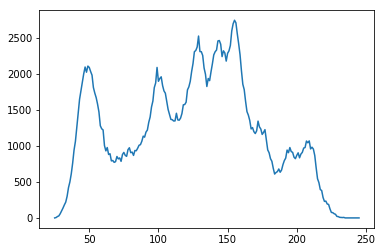

In [14]:
table = pd.crosstab(img_gray_plt[0],columns = 'counts')
plt.plot(table)

#對比不強：顏色的值集中在某個區域

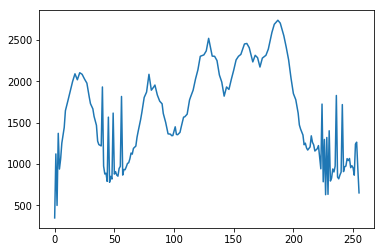

In [15]:
# 灰階圖片直方圖均衡
img_gray_equal = cv2.equalizeHist(img_gray)
img_gray_plte = img_gray_equal.reshape([1, 512*512])
table2 = pd.crosstab(img_gray_plte[0],columns = 'counts')
plt.plot(table2)

#增強對比：透過數學公式將值分散到 0~255 區間

In [16]:
# 組合圖片 + 顯示圖片
img_gray_equalHist = np.hstack((img_gray, img_gray_equal))
while True:
    # 比較灰階圖片是否有做直方圖均衡的差異
    cv2.imshow('gray equal histogram', img_gray_equalHist)

    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 調整對比 / 明亮

$g = \alpha f+\beta$

$\alpha$ is contrast

$\beta$ is brightness

In [17]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
while True:
    # 比較不同程度的對比 / 明亮
    cv2.imshow('adjust contrast and brighness', img_contrast_light)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break